# **Telecom Churn Analytics:**
## ***Building Predictive Models to Improve Customer Retention***

### Section 3: Data Visualization 🔍📈

---

### Objectives

In Section 3, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made.


### Inputs

* 2 cleaned datasets prepared in the previous sections will be used. 
 *  [telecom_customer_churn_cleaned.csv](../dataset/processed/telecom_customer_churn_cleaned.csv)   
 *  [telecom_customer_churn_encoded.csv](../dataset/processed/telecom_customer_churn_encoded.csv)

### ✅ Business Requirements Recap

Key Requirements
* Accurate Churn Prediction

    * Develop a model to predict whether a customer is likely to churn in the next billing cycle.

* Key Driver Identification

    * Pinpoint the most influential demographic and subscription attributes driving churn.

* Actionable Insights

    * Translate model outputs into retention strategies (e.g., targeted offers, loyalty programs).

* Seamless Integration

    * Deploy the model into existing CRM and marketing systems for real‑time use.

* Performance Metrics

    * Achieve at least 80% recall on churners (to minimize missed at‑risk customers) while maintaining acceptable precision.


### 📌 Hypothesis

**H1:** Customers on **`month-to-month`** contracts are more likely to churn than those on annual contracts.

**H2:** Customers with longer **`tenure`** are less likely to churn.

**H3:** **`SeniorCitizen`** Customers are more likey to churn.

**H4:** Customers who use **`fiber optic`** internet services have higer churn rates.

**H5:** Internet Customers with add-ons services like **`OnlineSecurity`** and **`TechSupport`** are less likey to churn.



### Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook and Streamlit Dashboard. The result and insight will be summarized in [README.md](../README.md).





---

### Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")


You set a new current directory: /Users/denniskwok/Documents/data-analytics/telecom-churn-ml-prediction


### Load dataset

In [13]:
import numpy as np
import pandas as pd

# Load datasets from csv files
df = pd.read_csv("dataset/processed/telecom_customer_churn_cleaned.csv")
df_encoded = pd.read_csv("dataset/processed/telecom_customer_churn_encoded.csv")

---

### **Part A:** **Uncovering Churn Drivers: Feature Correlation EDA**
#### *Descriptive Analysis with Matplotlab, Seaborn and plotly*

#### **Churn Drivers Overview**
##### 1. Top 10 Features Correlation with Churn**

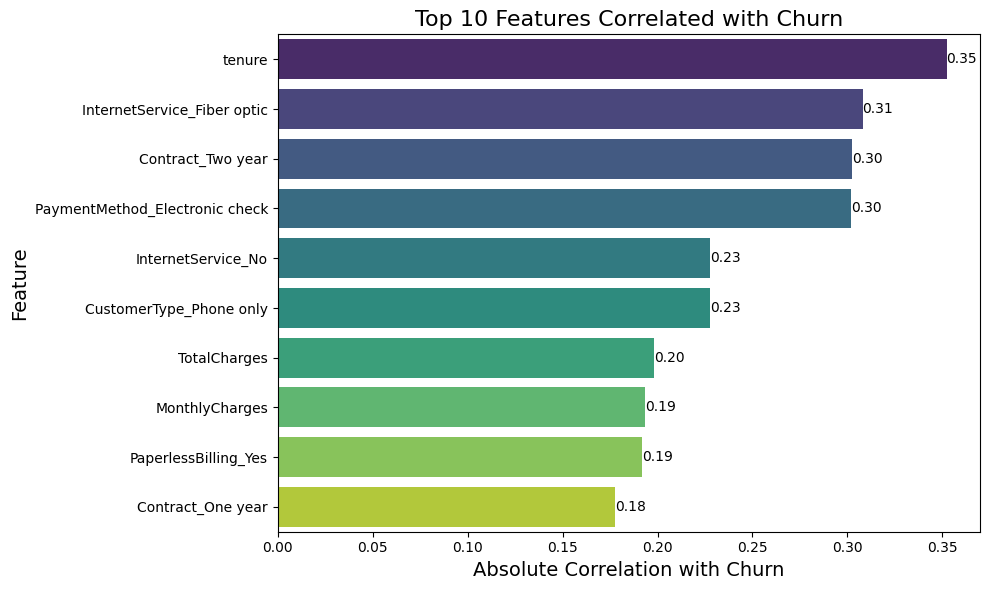

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# List top 10 features correlated with churn
correlation_matrix = df_encoded.corr()
correlation_with_churn = correlation_matrix["Churn_Yes"].abs().sort_values(ascending=False)
top_10_features = correlation_with_churn.index[1:11]  # Exclude 'Churn_Yes' itself
top_10_values = correlation_with_churn.values[1:11]

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    "Feature": top_10_features,
    "Correlation": top_10_values
})

# Bar plot with hue assigned to 'Feature'
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=plot_df,
    x="Correlation",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title("Top 10 Features Correlated with Churn", fontsize=16)
plt.xlabel("Absolute Correlation with Churn", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


#### 2. Top 5 Internet Add-on Services Correlation with Churn

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_10705/3448030606.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=addon_corr_internet.values, y=addon_corr_internet.index, palette="magma")


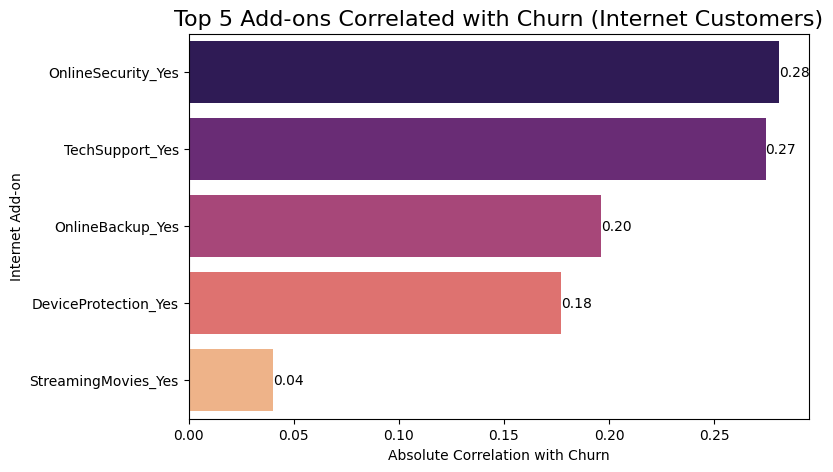

In [4]:
# Filter for customers with internet service
internet_customers = df_encoded[df_encoded["InternetService_No"] == 0]

# Recalculate correlation for add-ons with churn
add_on_cols = [
    "OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes",
    "TechSupport_Yes", "StreamingTV_Yes", "StreamingMovies_Yes"
]
addon_corr_internet = internet_customers[add_on_cols + ["Churn_Yes"]].corr()["Churn_Yes"].abs().sort_values(ascending=False).head(6)
addon_corr_internet = addon_corr_internet.drop("Churn_Yes").head(5)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=addon_corr_internet.values, y=addon_corr_internet.index, palette="magma")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
plt.title("Top 5 Add-ons Correlated with Churn (Internet Customers)", fontsize=16)
plt.xlabel("Absolute Correlation with Churn", fontsize=10)
plt.ylabel("Internet Add-on", fontsize=10)
plt.show()

---

#### **Service Type Analysis**
##### Churn Rates by Internet Service Type

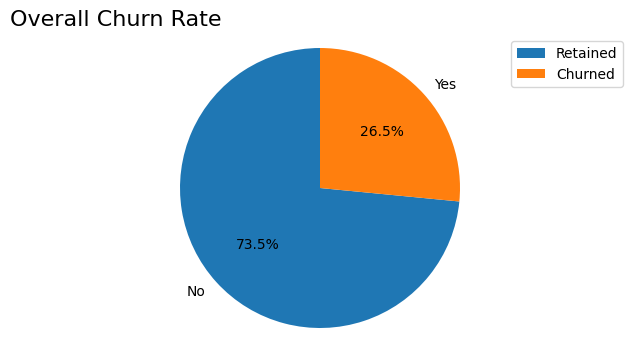

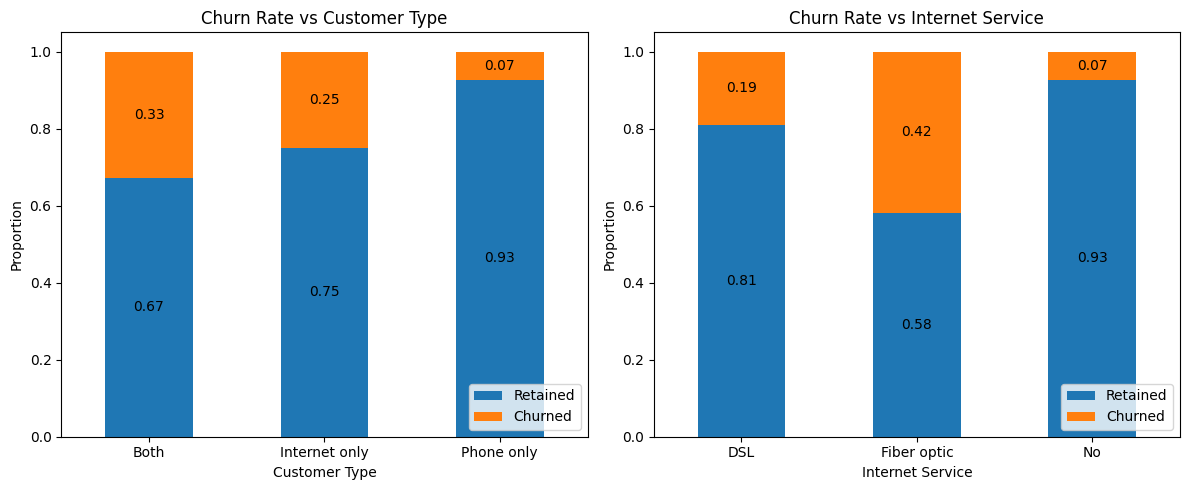

In [ ]:
# Overall churn rate presentation
churn_counts = df["Churn"].value_counts(normalize=True)
plt.figure(figsize=(8, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("🎯 Overall Churn Rate", fontsize=16, loc='left')
plt.legend(labels=["Retained", "Churned"], loc="upper right")
plt.axis('equal')
plt.show()

# Bar chart for phone or internet service vs churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
phone_service_churn = df.groupby("CustomerType")["Churn"].value_counts(normalize=True).unstack().fillna(0)
phone_service_churn.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Churn Rate vs Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Proportion")
plt.legend(labels=["Retained", "Churned"], loc="lower right")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', label_type='center', fontsize=10)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
internet_service_churn = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack().fillna(0)
internet_service_churn.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Churn Rate vs Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Proportion")
plt.legend(labels=["Retained", "Churned"], loc="lower right")
plt.xticks(rotation=0)
plt.tight_layout()
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', label_type='center', fontsize=10)
plt.show()


**Findings:**
* Customers with fiber optic internet show significantly higher churn rates of 42% compared to DSL (19%) or phone-only (7%) users.
* High churn rate of Fiber optic internet users is likely due to higher service expectations and price sensitivity.
* DSL or phone customers are typically for stable basic serivce and less likely to switch providers.

##### **Tenure, Contract Type and Churn Analysis**

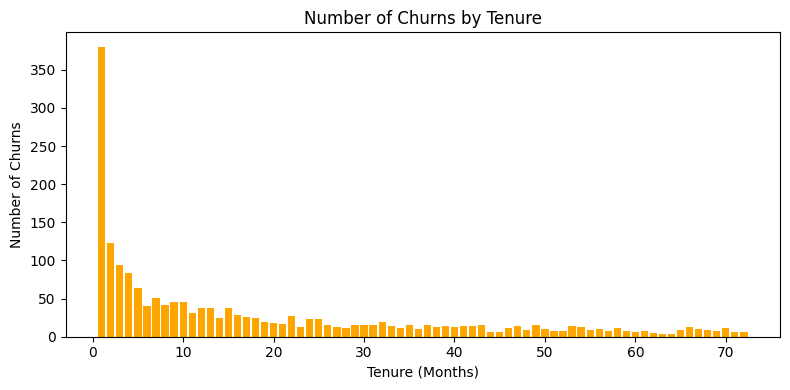

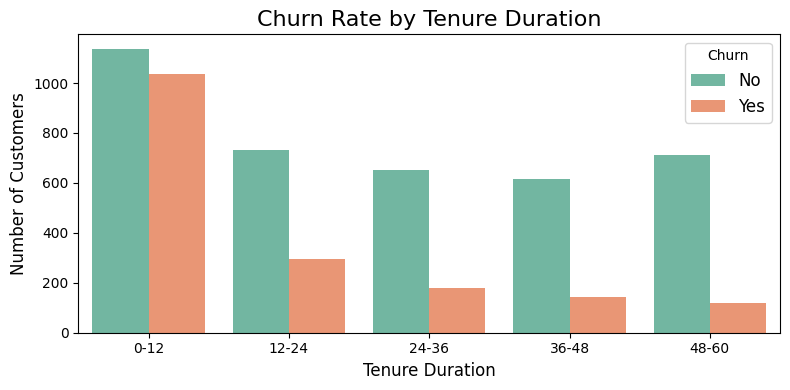

In [ ]:
# Bar Plot for tenure vs Churn
churn_count = df[df["Churn"] == "Yes"].groupby("tenure").size()
plt.figure(figsize=(8, 4))
plt.bar(churn_count.index, churn_count.values, color='orange')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Churns")
plt.title("Number of Churns by Tenure")
plt.tight_layout()
plt.show()

# Bar Plot for bin tenure_group vs Churn
df["tenure_group"] = pd.cut(df["tenure"], bins=[0, 12, 24, 36, 48, 60], labels=["0-12", "12-24", "24-36", "36-48", "48-60"])

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="tenure_group", hue="Churn", palette="Set2")
plt.title("Churn Rate by Tenure Duration", fontsize=16)    
plt.xlabel("Tenure Duration", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", fontsize=12)
plt.tight_layout()
plt.show()

# Plotly strip plot for tenure vs chrun
fig = px.strip(df, x="Contract", y="tenure", color="Churn",
               title="📊 Distribution of Tenure and Churn Status by Contract Type",
               labels={"tenure": "Tenure (Months)", "Contract": "Contract Type", "Churn": "Churn"},
               stripmode="overlay")
fig.update_layout(height=500, width=800)
fig.show()

# Plotly box plot for tenure vs chrun (expanded)
fig = px.box(df, x="Contract", y="tenure", color="Churn",
             title="📚 Distribution of Tenure and Churn Status by Contract Type (Expanded)",
             labels={"tenure": "Tenure (Months)", "Contract": "Contract Type", "Churn": "Churn"},
             points="all", 
             hover_data=["MonthlyCharges", "PaymentMethod", "InternetService"])

fig.update_layout(boxmode="group", height=500, width=800)
fig.show()

**Findings:**
* Most customer churn occurs within the first few months of tenure, indicating that new customers are at the highest risk of leaving early.
* The boxplot shows customers on month-to-month contracts have shorter tenure and much higher churn rates, while those on one-year or two-year contracts tend to stay longer and are less likely to churn.

#### **Senior Citizen Customer Analysis**
##### 1. Stacked bar chart for senior vs churn

In [7]:
# Stacked bar chart for senior vs churn with plotly
selected_churn = ["No", "Yes"]
filtered_churn = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack().fillna(0).reset_index()

columns_to_keep = ["SeniorCitizen"] + selected_churn
filtered_churn = filtered_churn[columns_to_keep]
melted = filtered_churn.melt(id_vars="SeniorCitizen", value_vars=selected_churn,
                            var_name="Churn", value_name="Rate")
melted["SeniorCitizen"] = melted["SeniorCitizen"].map({0: "Non-Senior", 1: "Senior"})

fig = px.bar(melted, x="SeniorCitizen", y="Rate", color="Churn", barmode="stack",
            text="Rate", title="Churn Rate by Senior Status",
            labels={"Rate": "Proportion", "SeniorCitizen": "Customer Type"})
fig.update_traces(texttemplate='%{text:.1%}', textposition='inside')
fig.update_layout(yaxis_tickformat=".0%", yaxis_range=[0, 1], height=500)
fig.show()

# Section: Service Usage by Senior Status and Churn Status
service_features = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection']
senior_services = df.groupby('SeniorCitizen')[service_features].apply(lambda x: x.eq('Yes').mean()).reset_index()
senior_services['SeniorCitizen'] = senior_services['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'})
melted_services = senior_services.melt(id_vars='SeniorCitizen', var_name='Service', value_name='UsageRate')

fig = px.bar(
    melted_services,
    x='Service',
    y='UsageRate',
    color='SeniorCitizen',
    barmode='group',
    title='🔍 Internet Service Usage Comparison: Seniors vs Non-Seniors',
    labels={'UsageRate': 'Usage Rate'}
)
fig.update_traces(texttemplate='%{y:.1%}', textposition='outside')
fig.layout.height = 550
fig.update_layout(yaxis_tickformat=".0%")
fig.show()

Findings: 
* Senior customers have a higher churn rate than non-seniors and are less likely to use add-on services like Online Security, Tech Support.
* The lack of online security and tech support may induce a bad user experience, which leads to a higher churn rate among telecom customers, especially the non-techical senior customers.

#### **Internet Add-on services Analysis**
##### 1. Bar Plot for Number of Internet Serivce by Churn

In [ ]:
# Bar plot for NumInternetServices vs Churn rate
selected_churn = ["No", "Yes"]
filtered_df = df[df["InternetService"] != "No"]
filtered_churn = filtered_df.groupby("NumInternetServices")["Churn"].value_counts(normalize=True).unstack().fillna(0).reset_index()

# Melt the dataframe for plotly
melted_churn = filtered_churn.melt(id_vars="NumInternetServices", value_vars=selected_churn,
								   var_name="Churn", value_name="Rate")

fig = px.bar(melted_churn, x="NumInternetServices", y="Rate", color="Churn",
			 barmode="group", title="📡 Churn Rate vs Number of Internet Add-on Services",
			 labels={"Rate": "Churn Rate", "NumInternetServices": "Number of Internet Services"})
fig.update_traces(texttemplate='%{y:.1%}', textposition='outside')
fig.update_layout(yaxis_tickformat=".0%")
fig.show()

**Findings:**
* Apparently, more internet services subsription would increase the customer loyalty and retention. Customers with fewer or no internet add-on services have significantly higher churn rates.



Let's looks into online security and tech support further.

##### 2. Churn comparison by Online Security and Tech Support

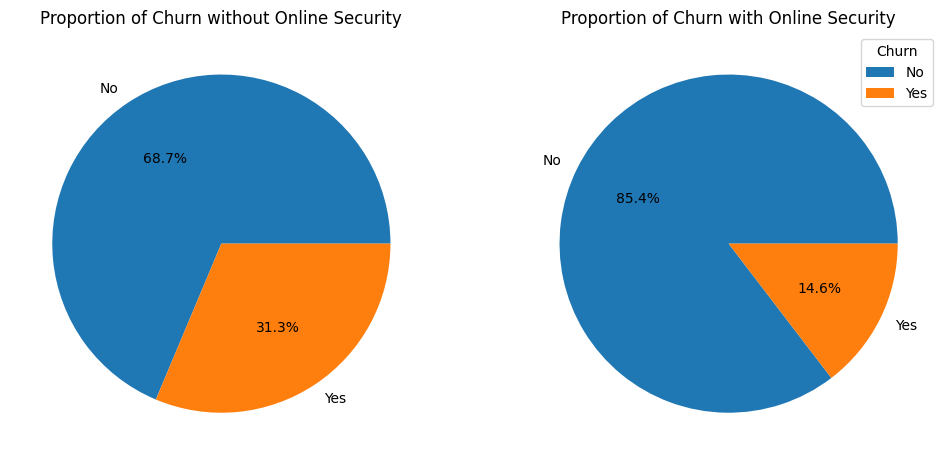

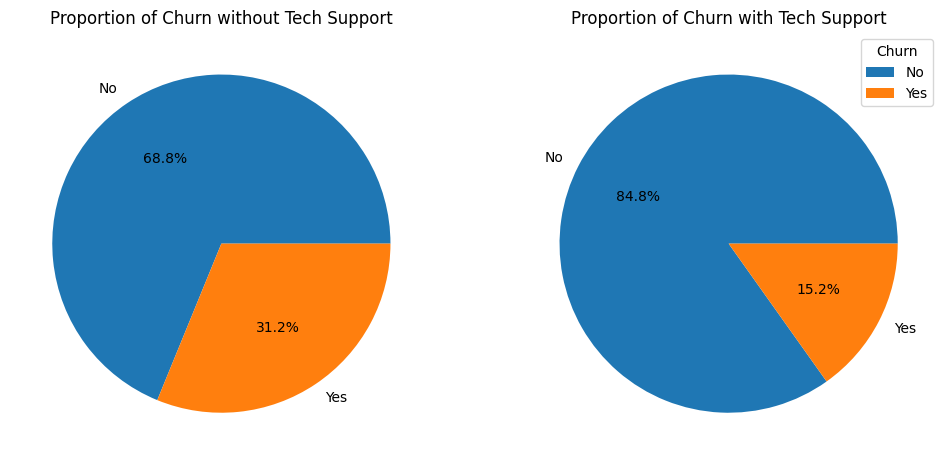

In [9]:
# Proportion of the target variable 'Churn' by online security feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
online_security_counts_no = df[df['OnlineSecurity'] == "No"]['Churn'].value_counts()
plt.pie(online_security_counts_no.values, labels=online_security_counts_no.index, autopct='%1.1f%%')
plt.title('Proportion of Churn without Online Security')
plt.subplot(1, 2, 2)
online_security_counts = df[df['OnlineSecurity'] == "Yes"]['Churn'].value_counts()
plt.pie(online_security_counts.values, labels=online_security_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Churn with Online Security')
plt.legend(title='Churn')
plt.show()

# Proportion of the target variable 'Churn' by tech support feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
tech_support_counts_no = df[df['TechSupport'] == "No"]['Churn'].value_counts()
plt.pie(tech_support_counts_no.values, labels=tech_support_counts_no.index, autopct='%1.1f%%')
plt.title('Proportion of Churn without Tech Support')
plt.subplot(1, 2, 2)
tech_support_counts = df[df['TechSupport'] == "Yes"]['Churn'].value_counts()
plt.pie(tech_support_counts.values, labels=tech_support_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Churn with Tech Support')
plt.legend(title='Churn')
plt.show()

Findings:
* Customers without Online Security or Tech Support have significantly higher churn rates compared to those with these add-on services.
* The pie charts show that churn is much more prevalent among customers who do not subscribe to Online Security or Tech Support.
* Customers with Online Security: Only about 14.6% churn, while those without: about 31.3% churn.
* Customers with Tech Support: Only about 15.2% churn, while those without: about 31.2% churn.
* This suggests that offering or promoting these add-on services may help reduce customer churn.


### Inter-Correlation with Parallel Categories Plot

In [ ]:
df["Tenure"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49-72"]
)
df["churn"] = df["Churn"].map({"No": 0, "Yes": 1})


# Parallel Categories Plot for tenure, contract type, senior citizen, num of internet service, online security, tech support Features vs Churn
fig = px.parallel_categories(
    df,
    dimensions=["NumInternetServices", "Contract", "Tenure", "SeniorCitizen", "OnlineSecurity", "TechSupport",  "Churn"],
    color="churn",
    color_continuous_scale=px.colors.sequential.RdBu_r,
    title="🧩 Parallel Categories Plot for Selected Features vs Churn"
)
fig.update_layout(height=600)
fig.show()

**Findings:**
* The Parallel Categories Graph reveals how multiple features interact to influence churn, showing that customers with month-to-month contracts, few internet services, no online security or tech support, and senior status are most likely to churn.

---

### **Part B: Hypothesis Tests and Justification**

* A series of Statistical tests with table of result and boxplots that highlights:
    * Each hypothesis (H1–H5b)
    * The test used (Chi-square or t-test)
    * The p-value
    * Whether the result is statistically significant
    * Visual insight for the spread, skewness, and outliers

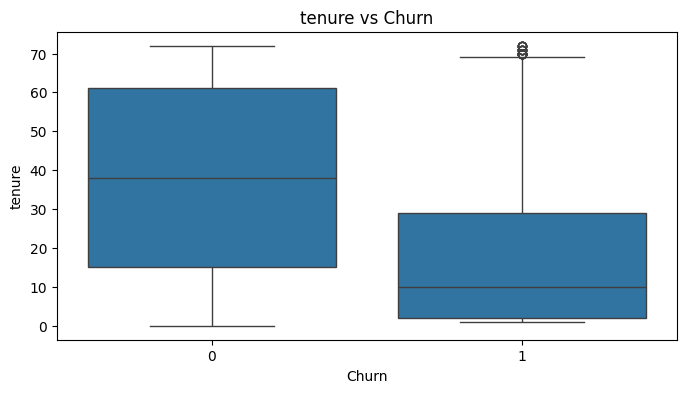

<Figure size 800x400 with 0 Axes>

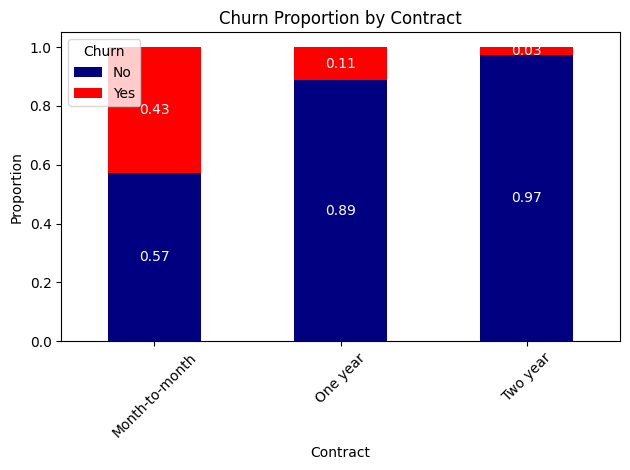

<Figure size 800x400 with 0 Axes>

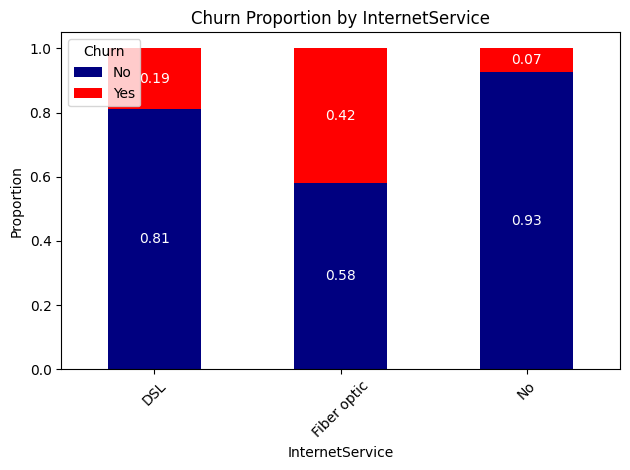

<Figure size 800x400 with 0 Axes>

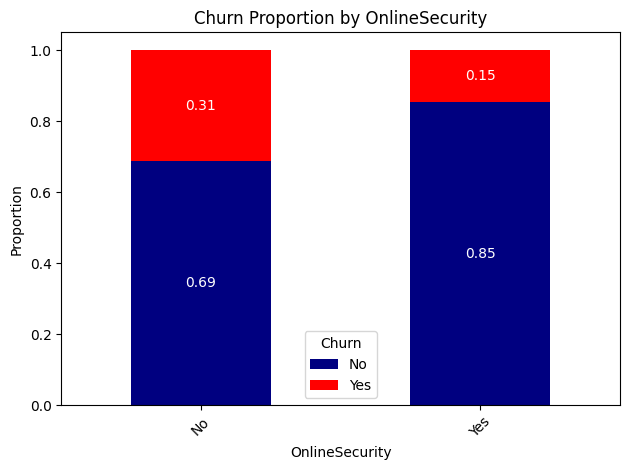

<Figure size 800x400 with 0 Axes>

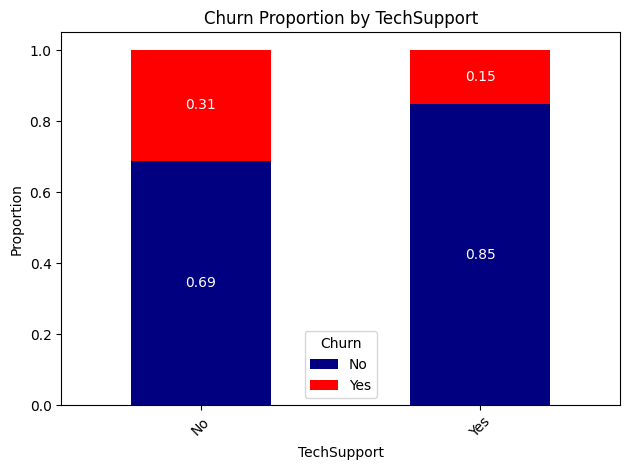

<Figure size 800x400 with 0 Axes>

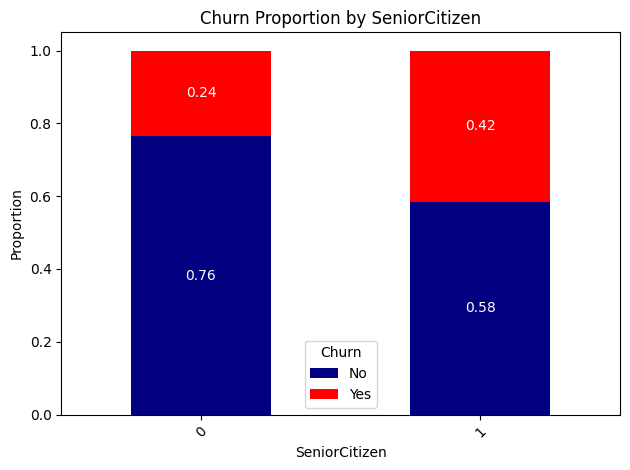

,Hypothesis,Test,p-value,Significant (<0.05)
0,H1: Contract Type,Chi-square,5.863038e-258,True
1,H2: Tenure,t-test,7.999058e-205,True
2,H3: SeniorCitizen,Chi-square,1.510067e-36,True
3,H4: InternetService,Chi-square,9.571788e-160,True
4,H5a: OnlineSecurity,Chi-square,1.232098e-46,True
5,H5b: TechSupport,Chi-square,2.923567e-43,True


In [11]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# Load cleaned dataset
df = pd.read_csv("dataset/processed/telecom_customer_churn_cleaned.csv")

# Convert churn to binary for clarity
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# -----------------------------
# H1: Contract type vs Churn
# -----------------------------
contingency_h1 = pd.crosstab(df['Contract'], df['Churn'])
chi2_h1, p_h1, _, _ = chi2_contingency(contingency_h1)

# -----------------------------
# H2: Tenure vs Churn
# -----------------------------
churned = df[df['Churn'] == 1]['tenure']
not_churned = df[df['Churn'] == 0]['tenure']

# Normality check
if df['tenure'].skew() > 1:
    stat_h2, p_h2 = mannwhitneyu(churned, not_churned)
    test_h2 = "Mann–Whitney U"
else:
    stat_h2, p_h2 = ttest_ind(churned, not_churned)
    test_h2 = "t-test"

# -----------------------------
# H3: SeniorCitizen vs Churn
# -----------------------------
contingency_h3 = pd.crosstab(df['SeniorCitizen'], df['Churn'])
chi2_h3, p_h3, _, _ = chi2_contingency(contingency_h3)

# -----------------------------
# H4: InternetService vs Churn
# -----------------------------
contingency_h4 = pd.crosstab(df['InternetService'], df['Churn'])
chi2_h4, p_h4, _, _ = chi2_contingency(contingency_h4)

# -----------------------------
# H5: OnlineSecurity & TechSupport vs Churn
# -----------------------------
contingency_h5a = pd.crosstab(df['OnlineSecurity'], df['Churn'])
chi2_h5a, p_h5a, _, _ = chi2_contingency(contingency_h5a)

contingency_h5b = pd.crosstab(df['TechSupport'], df['Churn'])
chi2_h5b, p_h5b, _, _ = chi2_contingency(contingency_h5b)

# -----------------------------
# === Visualization ===
# -----------------------------

# 1. Boxplots for numeric features
numeric_features = ["tenure"]
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Churn", y=feature, data=df)
    plt.title(f"{feature} vs Churn")
    plt.show()

# 2. Bar plots for categorical features
categorical_features = [
    "Contract", "InternetService", "OnlineSecurity",
    "TechSupport", "SeniorCitizen"
]

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    churn_rate = df.groupby(feature)["Churn"].value_counts(normalize=True).unstack().fillna(0)
    churn_rate.plot(kind="bar", stacked=True, color=["navy", "red"])
    plt.title(f"Churn Proportion by {feature}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=["No", "Yes"])
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.2f', label_type='center', fontsize=10, color='white')
    plt.tight_layout()
    plt.show()

# -----------------------------
# Summary
# -----------------------------
results = pd.DataFrame({
    "Hypothesis": ["H1: Contract Type", "H2: Tenure", "H3: SeniorCitizen", 
                   "H4: InternetService", "H5a: OnlineSecurity", "H5b: TechSupport"],
    "Test": ["Chi-square", test_h2, "Chi-square", "Chi-square", "Chi-square", "Chi-square"],
    "p-value": [p_h1, p_h2, p_h3, p_h4, p_h5a, p_h5b],
    "Significant (<0.05)": [p < 0.05 for p in [p_h1, p_h2, p_h3, p_h4, p_h5a, p_h5b]]
})

results


#### Conclusion:

All hypothesis tests yielded highly significant p-values, confirming that each proposed relationship is statistically robust and well-supported by the data.

* **Contract Type (H1):** Strongly influences churn — especially month-to-month contracts.

* **Tenure (H2):** Longer tenure correlates with lower churn.

* **SeniorCitizen (H3):** Senior status is a significant churn factor.

* **InternetService (H4):** Type of internet service impacts churn likelihood.

* **OnlineSecurity & TechSupport (H5a & H5b):** Lack of support services is strongly associated with higher churn.

Remarks: The outliers of churned customers with very long tenure likely represent users who stayed with the company for many years but eventually left, possibly due to a major service issue, a change in personal circumstances, or a better offer from a competitor. These cases are rare and may indicate that even loyal, long-term customers can churn if their needs or expectations are not met.

---

In the next section, we will train the ML model for churn prediction.